# Pospischil sPYr Example

### Install dependencies for ACT and setup environment

In [18]:
!pip install act-neuron

import os
import sys

from act import simulator, analysis
from IPython.display import Image
import numpy as np

# Download the repository with all relevant model files if in google colab
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !rm -rf ./ACT
    !git clone https://github.com/V-Marco/ACT
    base_dir = "./ACT"
else:
    base_dir = "../.."

### The non-segregated approach

Define a config file for ACT to run a simulation.

In [ ]:
config = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/Pospischil/sPyr/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/Pospischil/sPyr/orig_modfiles"),
        "name": "sPYr",
    },
    "simulation_parameters": {
        "h_v_init": -70.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "g_pas", "low": 5.0e-06, "high": 2.0e-05},
            {"channel": "gnabar_hh2", "low": 2.5e-02, "high": 1.0e-01},
            {"channel": "gkbar_hh2", "low": 2.5e-03, "high": 1.0e-02},
            {"channel": "gkbar_im", "low": 1.5e-05, "high": 6.0e-05},
            {"channel": "gcabar_it", "low": 5.0e-04, "high": 2.0e-03},
        ],
        "target_V": None,  # Target voltages
        "target_params": [1e-5, 0.05, 0.005, 3e-5, 0.001],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        {
            "params": ["g_pas"],
            "voltage": [-100, -65],
            "time": [0, 500],
        },
        {
            "params": ["gnabar_hh2", "gkbar_hh2", "gkbar_im", "gcabar_it"],
            "voltage": [-65, 100],
            "time": [0, 2000],
        },
    ],
    "output": {"folder": "output_Pospischil_sPYr", "produce_plots": True},
    "run_mode": "original",  # "original", "segregated"
}

In [9]:
# Run the simulation

simulator.run(config)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating cadecay_destexhe.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/cadecay_destexhe.c
Translating HH_traub.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/HH_traub.c
Notice: VERBATIM blocks are not thread safe
Notice: This mechanism cannot be used with CVODE
Thread Safe
Translating IM_cortex.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IM_cortex.c
Thread Safe
Translating IT_huguenard.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IT_huguenard.c
Thread Safe


INFO : Using neuron-nightly Package (Developer Version)
/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/IT_huguenard.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/cadecay_destexhe.mod
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/HH_traub.mod
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/IM_cortex.mod
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/IT_huguenard.mod
 -> Compiling cadecay_destexhe.c
 -> Compiling HH_traub.c
 -> Compiling IM_cortex.c
 -> Compiling IT_huguenard.c
 => LINKING shar

NEURON: The user defined name already exists: cad
 near line 0
 ^
        nrn_load_dll("./x86_64/....")


Successfully created x86_64/special

(2023-09-03 18:00:41.369858)-[START]
(2023-09-03 18:00:41.369901)-[INFO]: Number of amplitudes: 120
(2023-09-03 18:00:41.378571)-[INFO]: Mod files already loaded. Continuing.
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-03 18:01:24.477568)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-03 18:01:24.540947)-[INFO]: Matching 12 amplitudes.
(2023-09-03 18:02:07.828889)-[INFO]: Total amplitudes matched: 5/12.
(2023-09-03 18:02:49.067263)-[INFO]: Total amplitudes matched: 10/12.
(2023-09-03 18:03:28.599945)-[INFO]: Total amplitudes matched: 16/12.
(2023-09-03 18:03:28.604107)-[INFO]: Matched amplitudes: [0.1 0.8 1.  1.3 1.4 1.6 3.1 3.4 3.9 4.4 4.8 4.9 5.1 6.3 8.4 9.6]
(2023-09-03 18:03:28.787354)-[INFO]: Training a model with SGD optimizer and lr = 1e-8.
(2023-09-03 18:03:28.7874

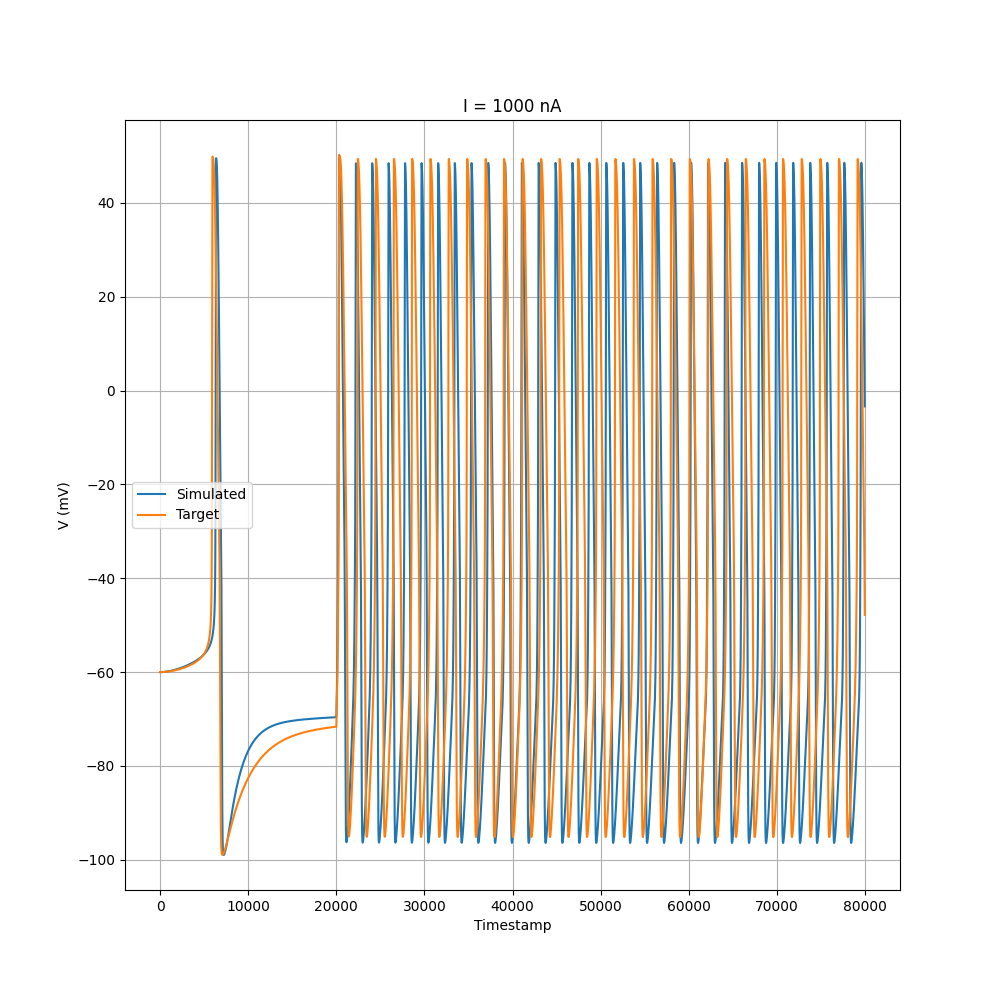

In [10]:
Image(filename="./output_Pospischil_sPYr/original/1000nA.png")

In [11]:
analysis.print_run_stats(config)

output_Pospischil_sPYr : original
Med MSE: 2814.8042 (11054.6103)
Med Corr: 0.2002 (0.3024)

Predicted values:
      g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.000018    0.032396   0.009997  0.000059   0.001989
Target values:
     g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.00001        0.05      0.005   0.00003      0.001
Error:
      g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.000008   -0.017604   0.004997  0.000029   0.000989

Pred MAE: 0.0047

Passive properties:
{
  "leak_conductance_variable": null,
  "leak_reversal_variable": null,
  "r_in": 128.3745574951172,
  "tau": 35.475,
  "v_rest": -69.61241912841797
}
----------



### Segregation with analytical setting of passive properties

In this section, let's set the passive properties for the cell so they can be analytically determined instead of using a model network.

In [24]:
config = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/Pospischil/sPyr/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/Pospischil/sPyr/seg_modfiles"),
        "name": "sPYr",
        "passive_properties": {
            "v_rest": -70.3,
            "r_in": 210,
            "tau": 64,
            "leak_conductance_variable": "g_pas",  # eg: g_leak
            "leak_reversal_variable": "e_pas",  # eg: e_leak
        },
    },
    "simulation_parameters": {
        "h_v_init": -70.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "gnabar_hh2", "low": 2.5e-02, "high": 1.0e-01},
            {"channel": "gkbar_hh2", "low": 2.5e-03, "high": 1.0e-02},
            {"channel": "gkbar_im", "low": 1.5e-05, "high": 6.0e-05},
            {"channel": "gcabar_it", "low": 5.0e-04, "high": 2.0e-03},
        ],
        "target_V": None,  # Target voltages
        "target_params": [0.05, 0.005, 3e-5, 0.001],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        {
            "params": ["gnabar_hh2", "gkbar_hh2", "gkbar_im", "gcabar_it"],
            "voltage": [-65, 100],
            "time": [0, 2000],
        },
    ],
    "output": {"folder": "output_Pospischil_sPYr_p", "produce_plots": True},
    "run_mode": "segregated",  # "original", "segregated"
}

In [25]:
simulator.run(config)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating cadecay_destexhe.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/cadecay_destexhe.c
Translating HH_traub.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/HH_traub.c
Notice: VERBATIM blocks are not thread safe
Translating IM_cortex.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IM_cortex.c
Thread Safe
Notice: This mechanism cannot be used with CVODE
Thread Safe
Translating IT_huguenard.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IT_huguenard.c
Thread Safe


INFO : Using neuron-nightly Package (Developer Version)
/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod
 -> Compiling cadecay_destexhe.c
 -> Compiling HH_traub.c
 -> Compiling IM_cortex.c
 -> Compiling IT_huguenard.c
 => LINKING shared library .

NEURON: The user defined name already exists: cad
 near line 0
 ^
        nrn_load_dll("./x86_64/....")


Successfully created x86_64/special

(2023-09-05 22:50:44.720632)-[START]
(2023-09-05 22:50:44.720679)-[INFO]: Number of amplitudes: 120
(2023-09-05 22:50:44.728519)-[INFO]: Mod files already loaded. Continuing.
Setting e_pas = -70.3
Setting sPYr[118].soma[0].g_pas = 0.00001645
Setting sPYr[118].soma[0].cm = 1.05261206
(2023-09-05 22:51:29.293316)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Setting e_pas = -70.3
Setting sPYr[119].soma[0].g_pas = 0.00001645
Setting sPYr[119].soma[0].cm = 1.05261206
(2023-09-05 22:51:29.345650)-[INFO]: Matching 12 amplitudes.
(2023-09-05 22:52:12.547908)-[INFO]: Total amplitudes matched: 2/12.
(2023-09-05 22:52:54.921525)-[INFO]: Total amplitudes matched: 3/12.
(2023-09-05 22:53:36.755333)-[INFO]: Total amplitudes matched: 4/12.
(2023-09-05 22:54:18.089766)-[INFO]: Total amplitudes matched: 6/12.
(2023-09-05 22:54:58.627350)-[INFO]: Total amplitudes matched: 6/12.
(2023-09-05 22:55:38.988662)-[INFO]: Total amplitudes matched: 8/12.
(2023-09-05

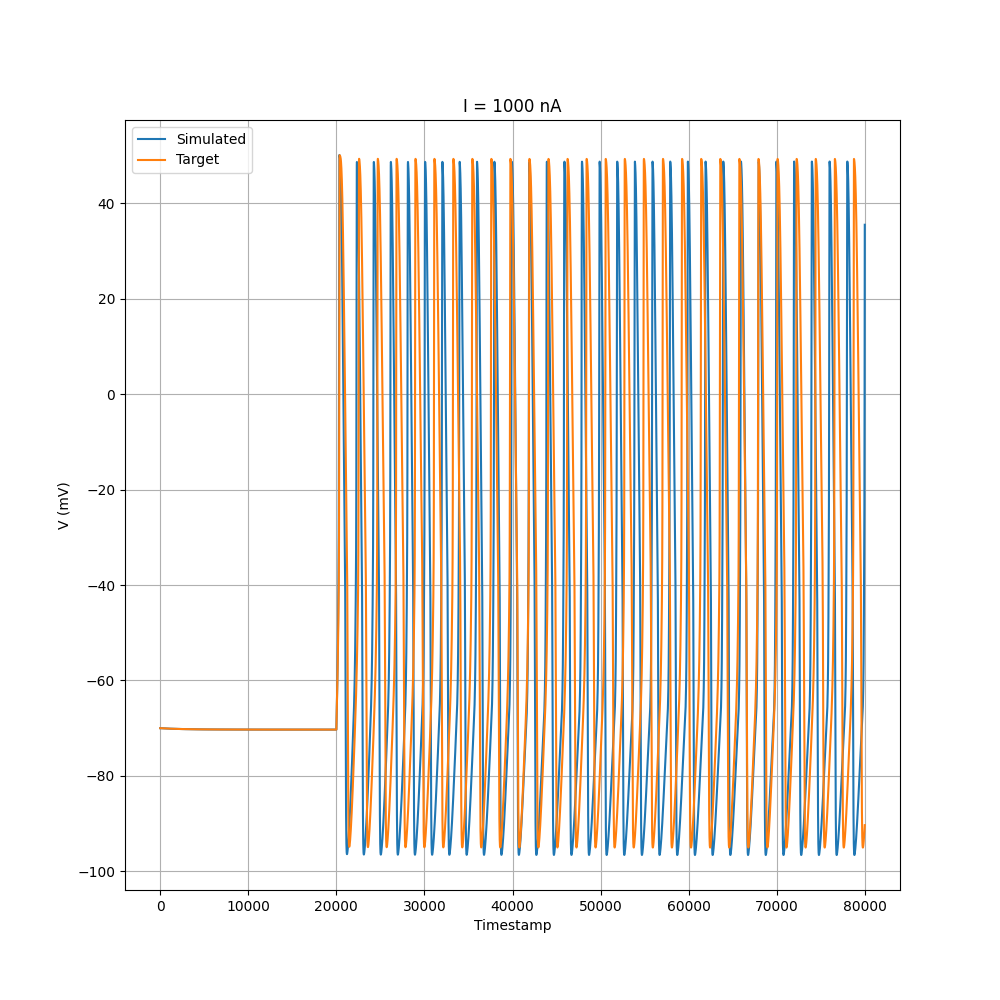

In [26]:
Image(filename="./output_Pospischil_sPYr_p/segregated/1000nA.png")

In [27]:
analysis.print_run_stats(config)

output_Pospischil_sPYr_p : segregated
Med MSE: 2278.0498 (1167.2902)
Med Corr: 0.2181 (0.3202)

Predicted values:
   gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0    0.033882   0.009922   0.00006   0.001972
Target values:
   gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0        0.05      0.005   0.00003      0.001
Error:
   gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0   -0.016118   0.004922   0.00003   0.000972

Pred MAE: 0.0055

Passive properties:
{
  "leak_conductance_variable": "g_pas",
  "leak_reversal_variable": "e_pas",
  "r_in": 209.91607666015625,
  "tau": 63.95,
  "v_rest": -70.29988098144531
}
----------



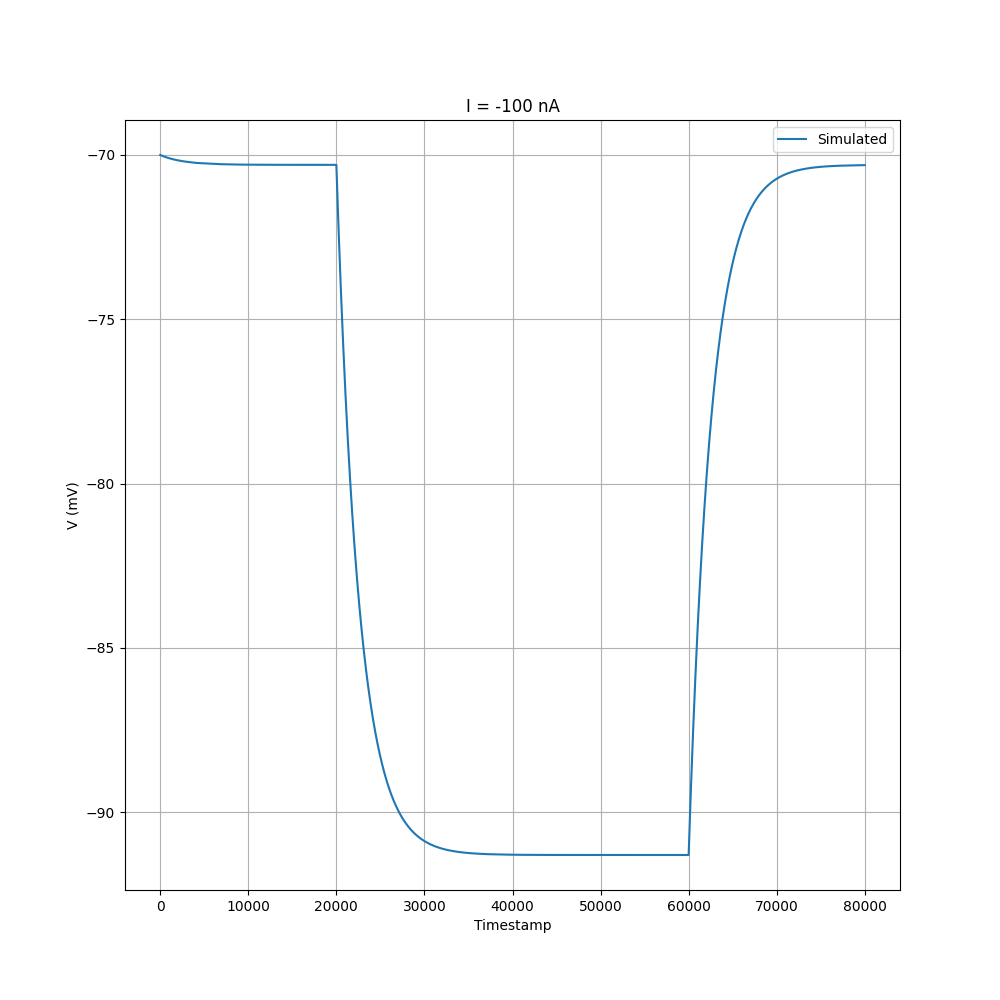

In [28]:
Image(filename="./output_Pospischil_sPYr_p/segregated/passive_-100nA.png")